In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# sitting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

#show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration:

In [10]:
df = pd.read_excel('./online_retail_II.xlsx',sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [12]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [13]:
# get information about object types
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [14]:
#Explore the NaN Customer ID
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [15]:
#find all quantities that less than 0
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [16]:
#find all invoices that more than 6 digits
df['Invoice'] = df['Invoice'].astype("str")
df[df['Invoice'].str.match("^\\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [17]:
#investigate any letter except C as "Cancelation" letter
df['Invoice'].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [18]:
#what is A letter
df[df['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [19]:
df[df['Invoice'].str.endswith("506401")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom


In [20]:
df['StockCode'] = df['StockCode'].astype("str")
df[df['StockCode'].str.match("^\\d{5}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [21]:
df[(df['StockCode'].str.match("^\\d{5}$")==False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [22]:
df[df['StockCode'].str.contains('DCGS0003')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
20249,491041,DCGS0003,BOXED GLASS ASHTRAY,1,2009-12-09 09:42:00,2.57,NaN,United Kingdom
232222,511858,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-11 10:05:00,2.51,NaN,United Kingdom
238355,512437,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-15 16:17:00,2.51,NaN,United Kingdom
244829,513099,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-21 15:13:00,2.51,NaN,United Kingdom
267418,515287,DCGS0003,BOXED GLASS ASHTRAY,1,2010-07-09 14:58:00,2.51,NaN,United Kingdom
421518,529727,DCGS0003,BOXED GLASS ASHTRAY,1,2010-10-29 14:12:00,2.51,NaN,United Kingdom
442200,531489,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-08 15:02:00,2.51,NaN,United Kingdom
466307,533348,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-17 09:23:00,2.51,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom


## Notes

## Stock Code

- StockCode is meant to follow the pattern `[0-9]{5}` but it seems to have legit values for `[0-9]{5}[a-zA-Z]+`
  - Also Contains other values:

| code        | description                                                                      | Action                  |
|-------------|----------------------------------------------------------------------------------|-------------------------|
| DCGS        | Looks valid, some quantities are negative though and customer ID is null         | Executed from clustering |
| D           | Looks Valid, represents discount values                                          | Executed from clustering |
| DOT         | Looks Valid, represents postage charges                                          | Executed from clustering |
| M OR m      | Looks Valid, represents manual transaction                                       | Executed from clustering |
| C2          | Looks Valid, represents CARRIAGE Fee                                             | Executed from clustering |
| C3          | Not Sure, only one transaction                                                   | Executed from clustering |
| BANK CHARGES| Bank Charges                                                                     | Executed from clustering |
| TESTXXX     | Test Data                                                                        | Executed from clustering |
| S           | Samples sent to customer                                                         | Executed from clustering |
| B           | Adjust bad debt                                                                  | Executed from clustering |
| SP1002      | Looks Like Special request item, only 2 Transactions, 3 look legit, 1 has 0 price| Executed from clustering |
| PADS        | Looks like legit stock code for padding                                          | Include clustering       |
| GIFT_XXXX_XX| Purchase with gift cards, might be interested for another analysis, but no customer data| Executed from clustering |
| AMAZONFEE   | Looks like Fee From Amazon Shipping or something                                 | Executed from clustering |
| ADJUSTX     | Looks like manual adjustments by admins                                          | Executed from clustering |


In [23]:
df[df['StockCode'].str.contains('DCGS')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
466308,533348,DCGSSBOY,BOYS PARTY BAG,1,2010-11-17 09:23:00,3.36,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom
496962,535835,DCGSSBOY,BOYS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom
496963,535835,DCGSSGIRL,GIRLS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom


# Data Cleaning

In [24]:
cleaned_df = df.copy()

In [25]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype("str")

mask = (
    cleaned_df['Invoice'].str.match("\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [26]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype("str")

mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$")==True) 
    | (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==True)
    | (cleaned_df['StockCode'].str.match("^PADS$")==True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [27]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.00,512796,512796.00,406337.00
mean,11.00,2010-06-28 18:26:52.709732352,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


In [28]:
cleaned_df.dropna(subset=["Customer ID"],inplace= True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18196\1974689455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"],inplace= True)


In [29]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [30]:
cleaned_df[cleaned_df['Price']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [31]:
cleaned_df= cleaned_df[cleaned_df['Price'] > 0]

In [32]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [33]:
cleaned_df['Price'].min()

0.001

In [34]:
len(cleaned_df)/ len(df)

0.7732429238325965

Dropped 23% of Records 

# Feature Engineering

In [35]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18196\3309217499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [36]:
aggregated_df = cleaned_df.groupby(by= "Customer ID",as_index=False).agg(
    MonetaryValue=('SalesLineTotal',"sum"),
    Frequency = ("Invoice","nunique"),
    LastInvoiceDate = ("InvoiceDate","max")
)

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [37]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17
4281,18284.00,411.68,1,2010-10-04 11:33:00,66
4282,18285.00,377.00,1,2010-02-17 10:24:00,295
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111


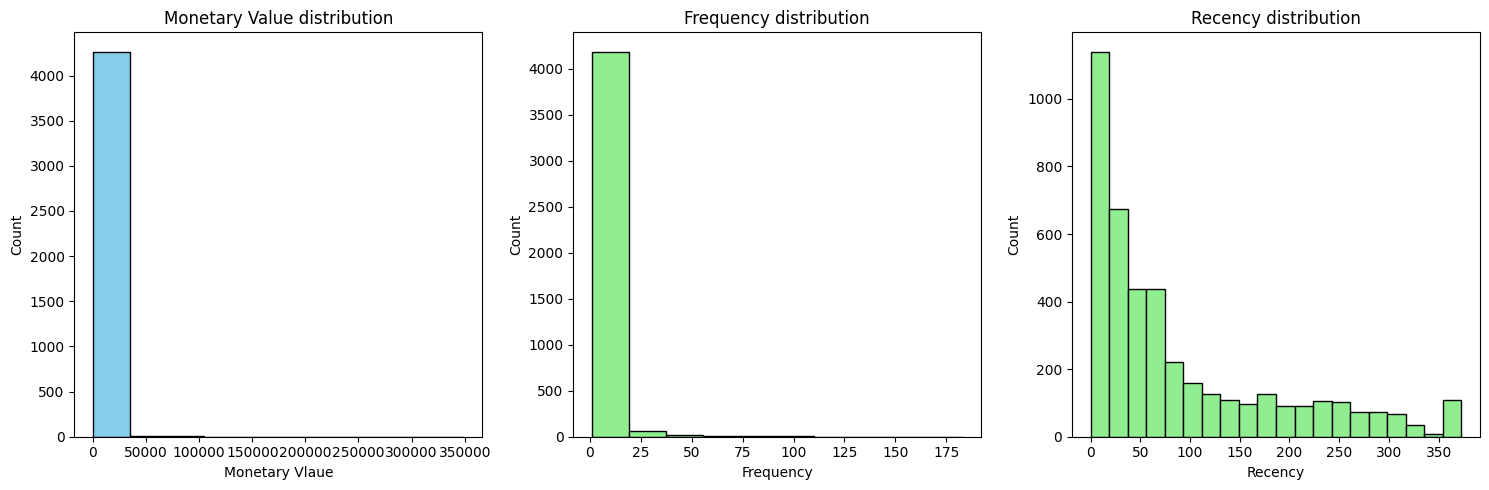

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor= 'black')
plt.title("Monetary Value distribution")
plt.xlabel("Monetary Vlaue")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor= 'black')
plt.title("Frequency distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins=20, color='lightgreen', edgecolor= 'black')
plt.title("Recency distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [39]:
aggregated_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,4285.00,4285.00,4285.00,4285,4285.00
mean,15356.81,2024.13,4.43,2010-09-11 00:06:10.431738624,89.55
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13891.00,307.56,1.00,2010-07-27 14:39:00,17.00
50%,15362.00,702.90,2.00,2010-10-19 12:10:00,51.00
75%,16840.00,1704.29,5.00,2010-11-22 11:24:00,135.00
max,18287.00,349164.35,183.00,2010-12-09 20:01:00,373.00
std,1699.84,8813.95,7.94,NaN,96.36


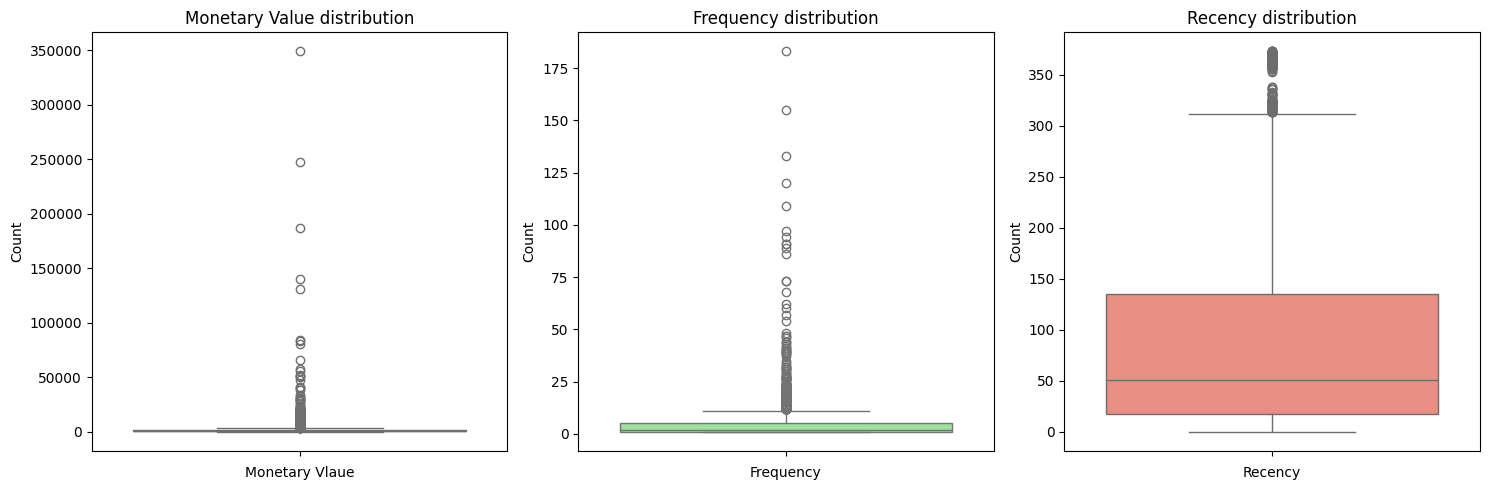

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df['MonetaryValue'],color="skyblue")
plt.title("Monetary Value distribution")
plt.xlabel("Monetary Vlaue")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df['Frequency'],color="lightgreen")
plt.title("Frequency distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df['Recency'],color="salmon")
plt.title("Recency distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [41]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3-M_Q1

Monetary_Outlier_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) 
                                    | (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))].copy()

Monetary_Outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [42]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

Frequency_Outlier_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR))].copy()

Frequency_Outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [43]:
non_outlier_df = aggregated_df[(~aggregated_df.index.isin(Monetary_Outlier_df.index)) & (~aggregated_df.index.isin(Frequency_Outlier_df.index))]
non_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


In [44]:
len(non_outlier_df)/len(aggregated_df)

0.8889148191365227

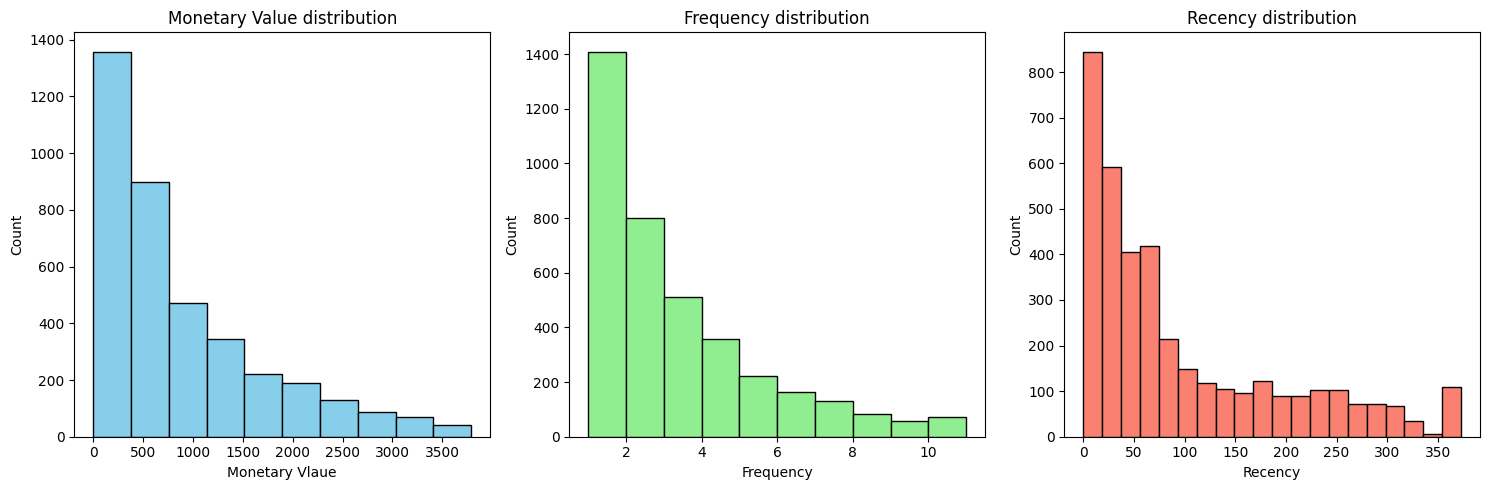

In [45]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(non_outlier_df['MonetaryValue'], bins=10, color='skyblue', edgecolor= 'black')
plt.title("Monetary Value distribution")
plt.xlabel("Monetary Vlaue")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(non_outlier_df['Frequency'], bins=10, color='lightgreen', edgecolor= 'black')
plt.title("Frequency distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(non_outlier_df['Recency'], bins=20, color='salmon', edgecolor= 'black')
plt.title("Recency distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

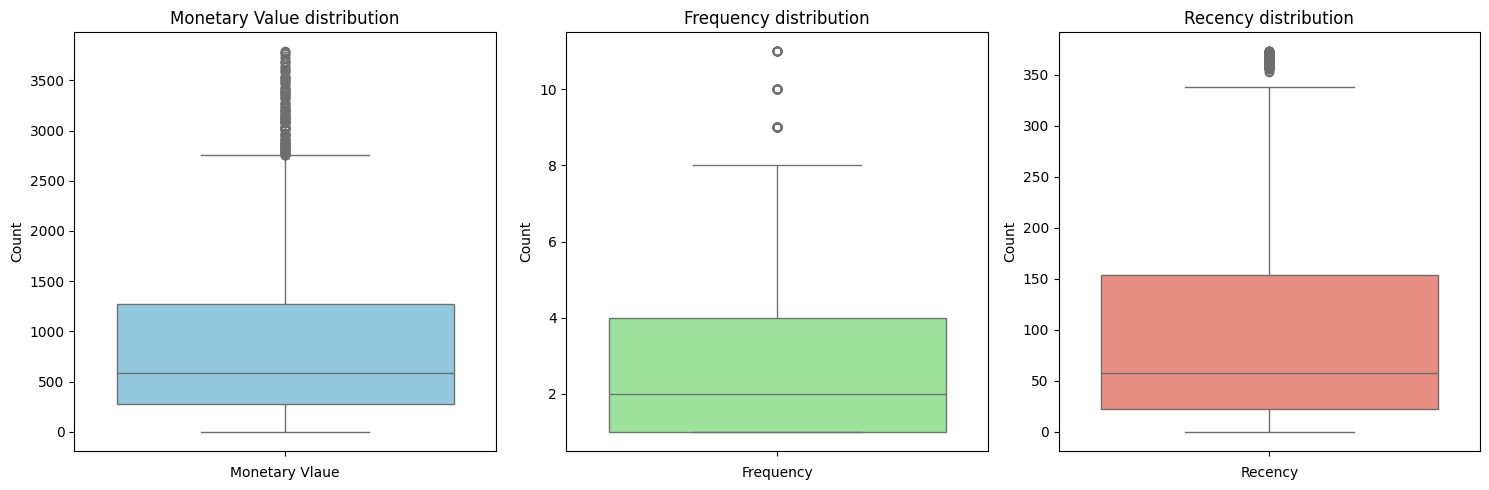

In [46]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outlier_df['MonetaryValue'],color="skyblue")
plt.title("Monetary Value distribution")
plt.xlabel("Monetary Vlaue")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(data=non_outlier_df['Frequency'],color="lightgreen")
plt.title("Frequency distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(data=non_outlier_df['Recency'],color="salmon")
plt.title("Recency distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

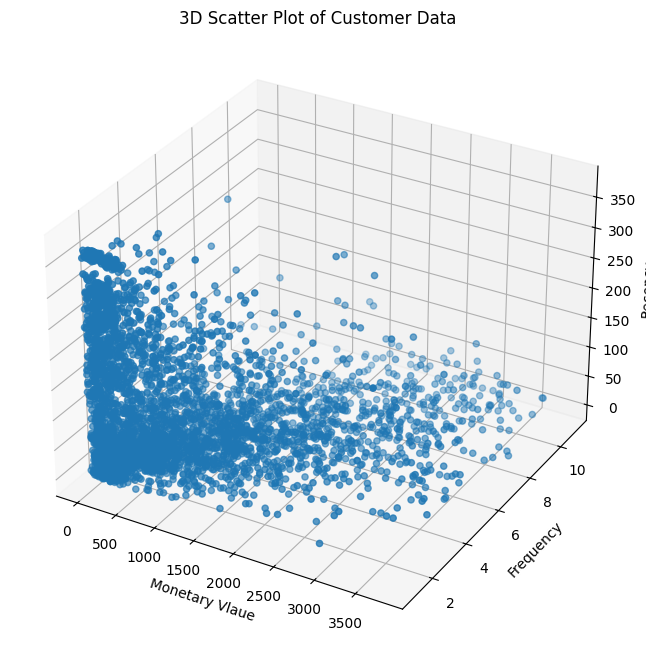

In [47]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection ="3d")

scatter = ax.scatter(non_outlier_df['MonetaryValue'],non_outlier_df['Frequency'],non_outlier_df['Recency'])

ax.set_xlabel("Monetary Vlaue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

### Standard Scaling

Standard Scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

$$
z = \frac{x - \mu}{\sigma}
$$

Where:

- $z$: The z-score
- $x$: The individual data point
- $\mu$: The mean of the dataset
- $\sigma$: The standard deviation of the dataset


In [48]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outlier_df[['MonetaryValue',"Frequency","Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [49]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outlier_df.index, columns=('MonetaryValue',"Frequency","Recency"))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


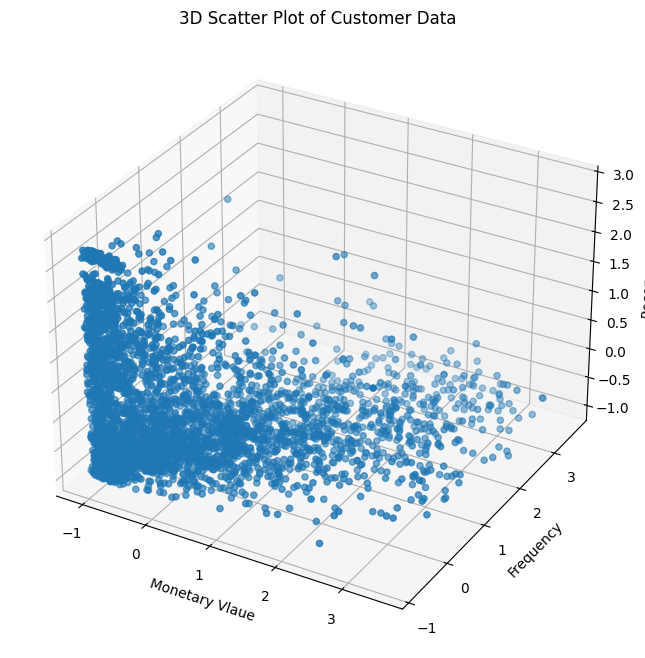

In [50]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection ="3d")

scatter = ax.scatter(scaled_data_df['MonetaryValue'],scaled_data_df['Frequency'],scaled_data_df['Recency'])

ax.set_xlabel("Monetary Vlaue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

# KMeans Clustering

to determine how many Clsutering to assign to our data, we are going to use the albow method.

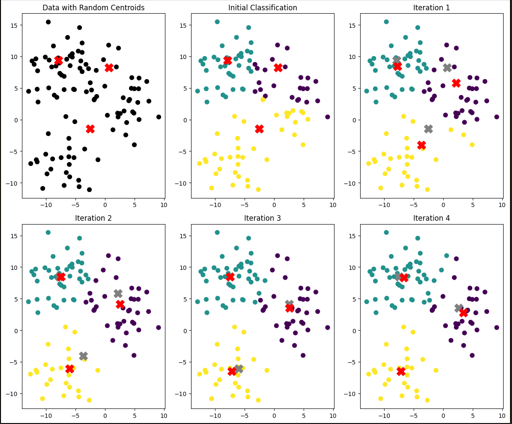  

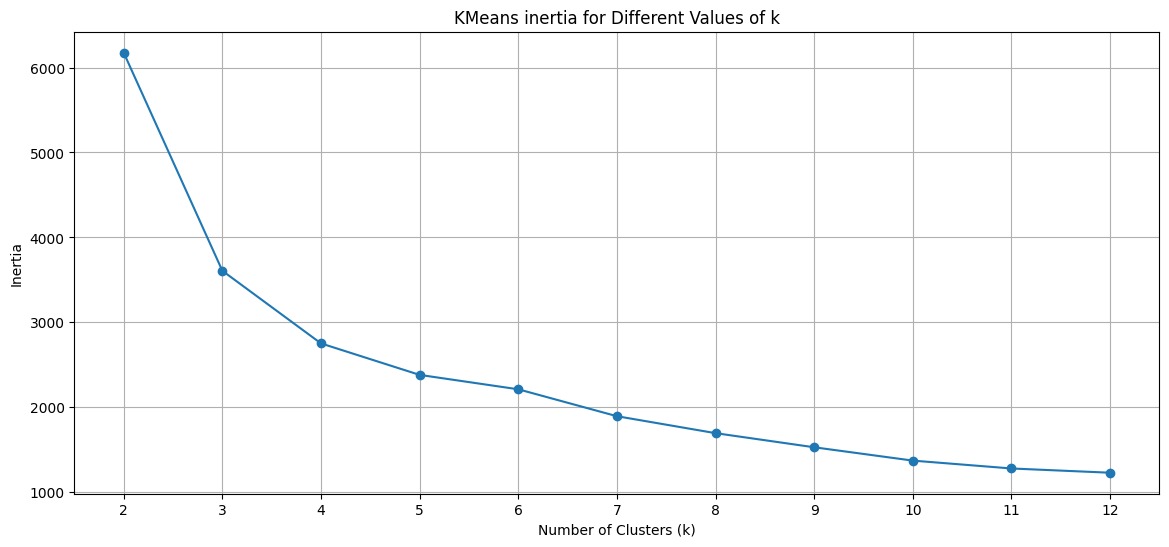

In [51]:
from sklearn.cluster import KMeans


max_k = 12

inertia = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters= k, random_state = 42, max_iter= 1000 )
    kmeans.fit_predict(scaled_data_df)
    
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(14,6))

plt.plot(k_values, inertia, marker="o")
plt.title("KMeans inertia for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.show()

to define more how many clusters i will use i will use defferent method called,

## Silhouette Score:

$$
s(i) = \frac{b(i) - a(i)}{max(a(i),b(i))}
$$

where:

- $s(i)$: is the silhouette score for single sample ($i$)
- $a(i)$: is the average distance between $i$ and all other points in the same cluster
- $b(i)$: is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The Silhouette Score range between $[-1,1]$, a higher value indicate more distance cluster

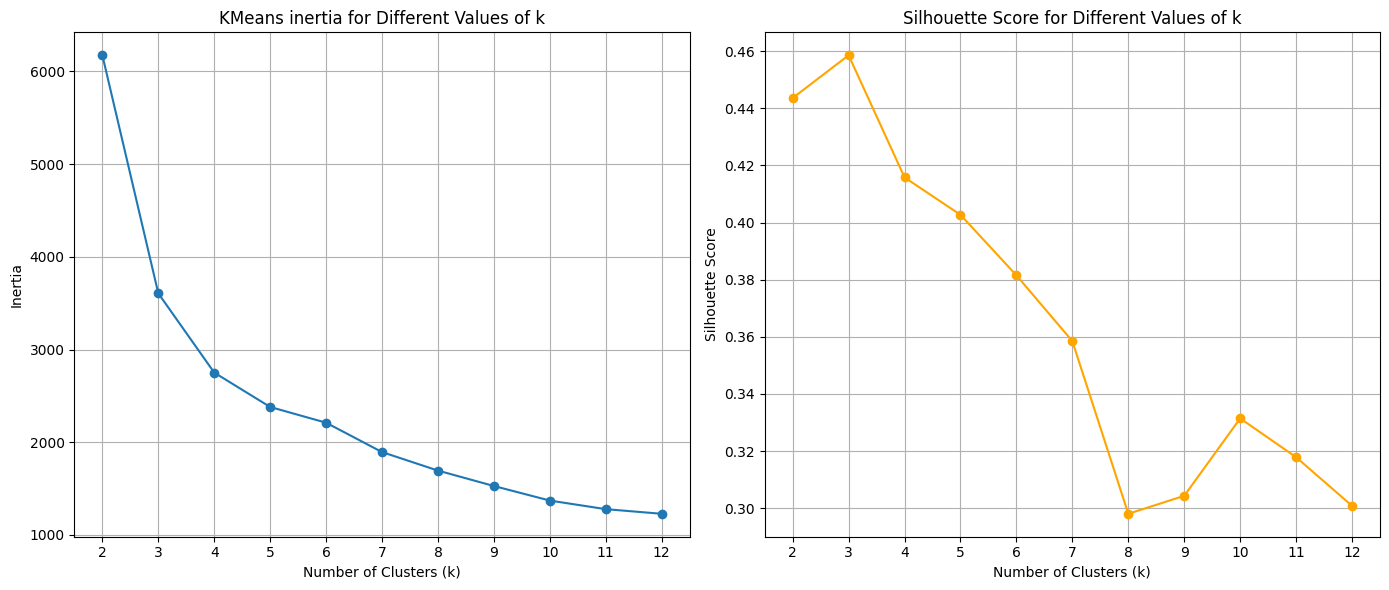

In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters= k, random_state = 42, max_iter= 1000 )
    
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    
    silhouette_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker="o")
plt.title("KMeans inertia for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker="o", color= 'orange')
plt.title("Silhouette Score for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [55]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter= 1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [56]:
non_outlier_df["Cluster"] = cluster_labels

non_outlier_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18196\273037984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


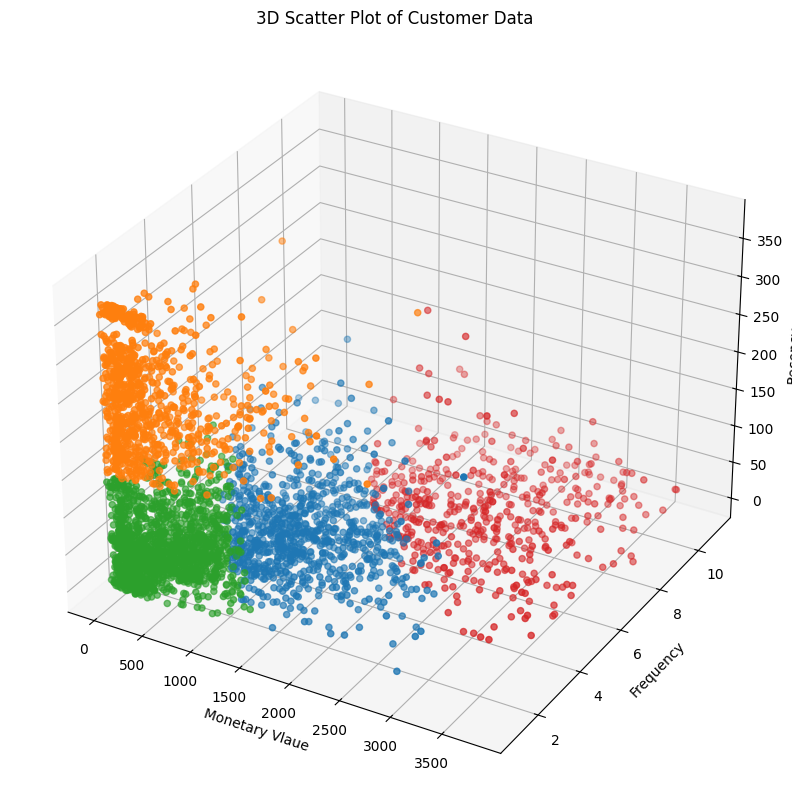

In [57]:
cluster_colors = {0: '#1f77b4',
                  1: '#ff7f0e',
                  2: '#2ca02c',
                  3: '#d62728'}

colors = non_outlier_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection ="3d")

scatter = ax.scatter(non_outlier_df['MonetaryValue'],
                     non_outlier_df['Frequency'],
                     non_outlier_df['Recency'], 
                     c= colors, 
                     marker= "o")

ax.set_xlabel("Monetary Vlaue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

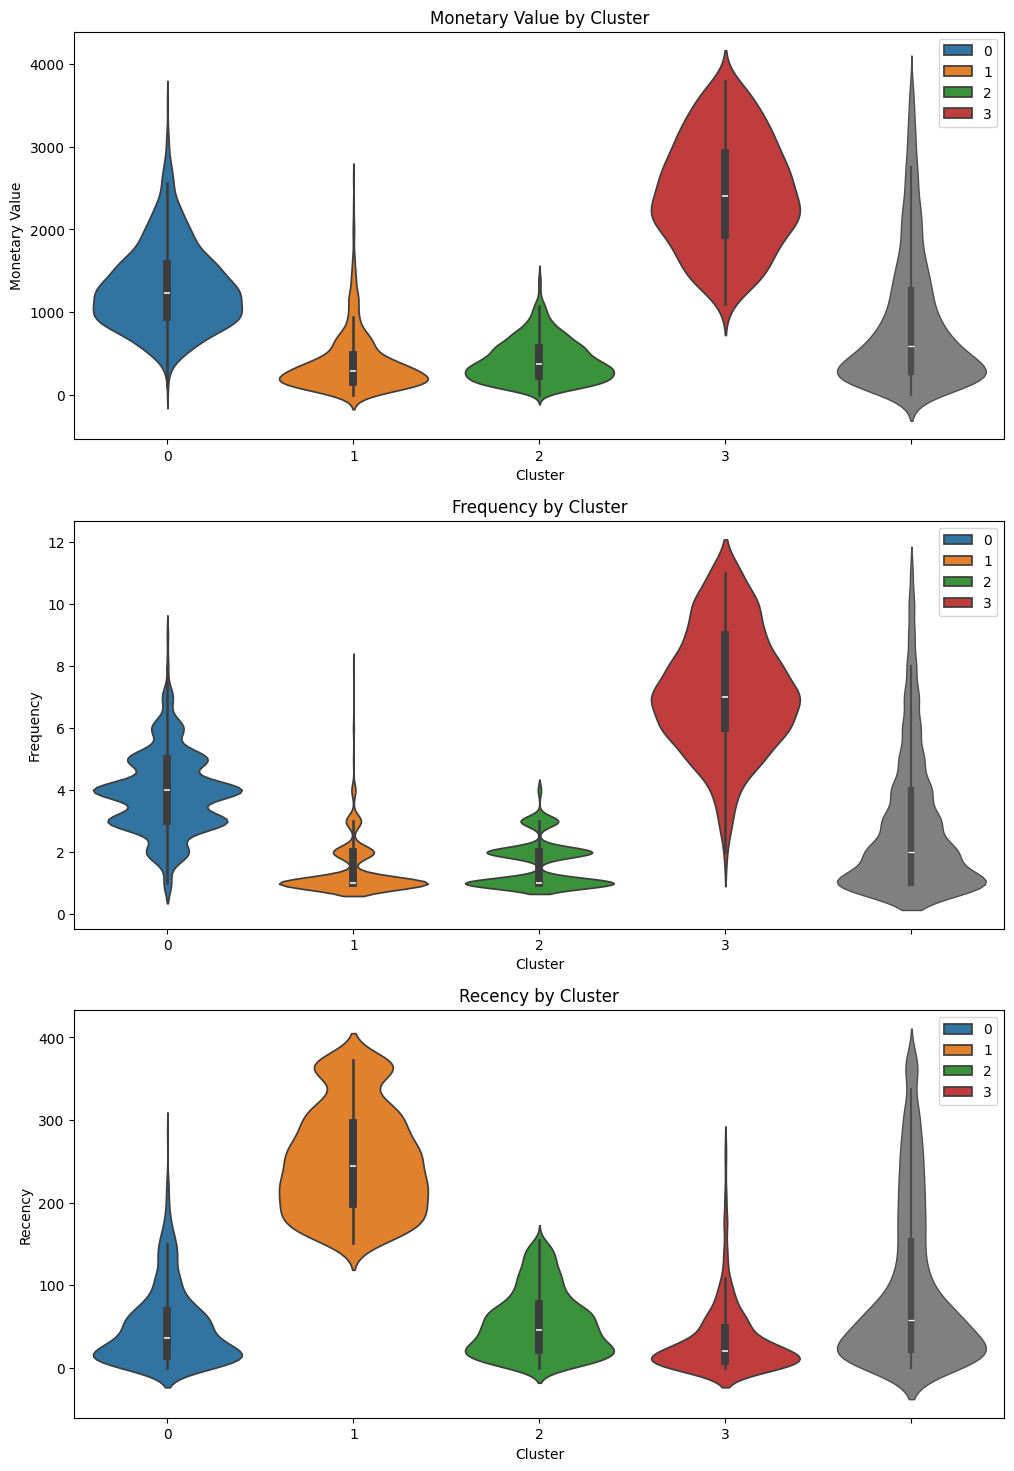

In [58]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['MonetaryValue'],palette= cluster_colors, hue= non_outlier_df['Cluster'])
sns.violinplot(y=non_outlier_df['MonetaryValue'], color='gray', linewidth= 1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['Frequency'],palette= cluster_colors, hue= non_outlier_df['Cluster'])
sns.violinplot(y=non_outlier_df['Frequency'], color='gray', linewidth= 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['Recency'],palette= cluster_colors, hue= non_outlier_df['Cluster'])
sns.violinplot(y=non_outlier_df['Recency'], color='gray', linewidth= 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout
plt.show()

1. Cluster 0 (Blue): "Retain"

- Rational: This Cluster represents high-value customers who purchase regulary, through not always very recently. the focus should be on retrention efforts to mentain their loyalty, and spending levels.
- Actions: Implement loyalty programs, personalized offers, and regular engagement to ensure they remains active.

2. Cluster 1 (Orange): "Re-Engage"

- Rational: This group include lower-value, infrequent buyer who haven't purchase recently, The focus Should be on re-engagement to bring them back into active purchasing behavior.
- Action: Use Targeted Marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluseter 2 (Green): "Nurture"

- Retional: This Cluster represent the last active and lowest-value Customers, but they have made recent purchase, these customers may be new or need nurturing to increase their engagement and spending.
- Action: Focus on Building relationships, providing excellent customer service, and offering incentive to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"

- Rational: This Cluster includes higher-value, very frequent buyer, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintain their Engagement.
- Action: Impelement a robust loyalty Program, Provide exclusive offers, and recoginze their loyalty to keep them engaged and satisfied.

### **Summary of Cluster Name:**

1. Cluster 0 (Blue): "Retain"
2. Cluster 1 (Orange): "Re-Engage"
3. Cluseter 2 (Green): "Nurture"
4. Cluster 3 (Red): "Reward"

## **Dealing With Outliers Data**

In [59]:
overlap_indices = Monetary_Outlier_df.index.intersection(Frequency_Outlier_df.index)

overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [60]:
Monetary_only_outliers = Monetary_Outlier_df.drop(overlap_indices)
Frequency_only_outliers = Frequency_Outlier_df.drop(overlap_indices)
Monetary_and_Frequency_outliers = Monetary_Outlier_df.loc[overlap_indices]

Monetary_only_outliers["Cluster"] = -1
Frequency_only_outliers["Cluster"] = -2
Monetary_and_Frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([Monetary_only_outliers,Frequency_only_outliers,Monetary_and_Frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


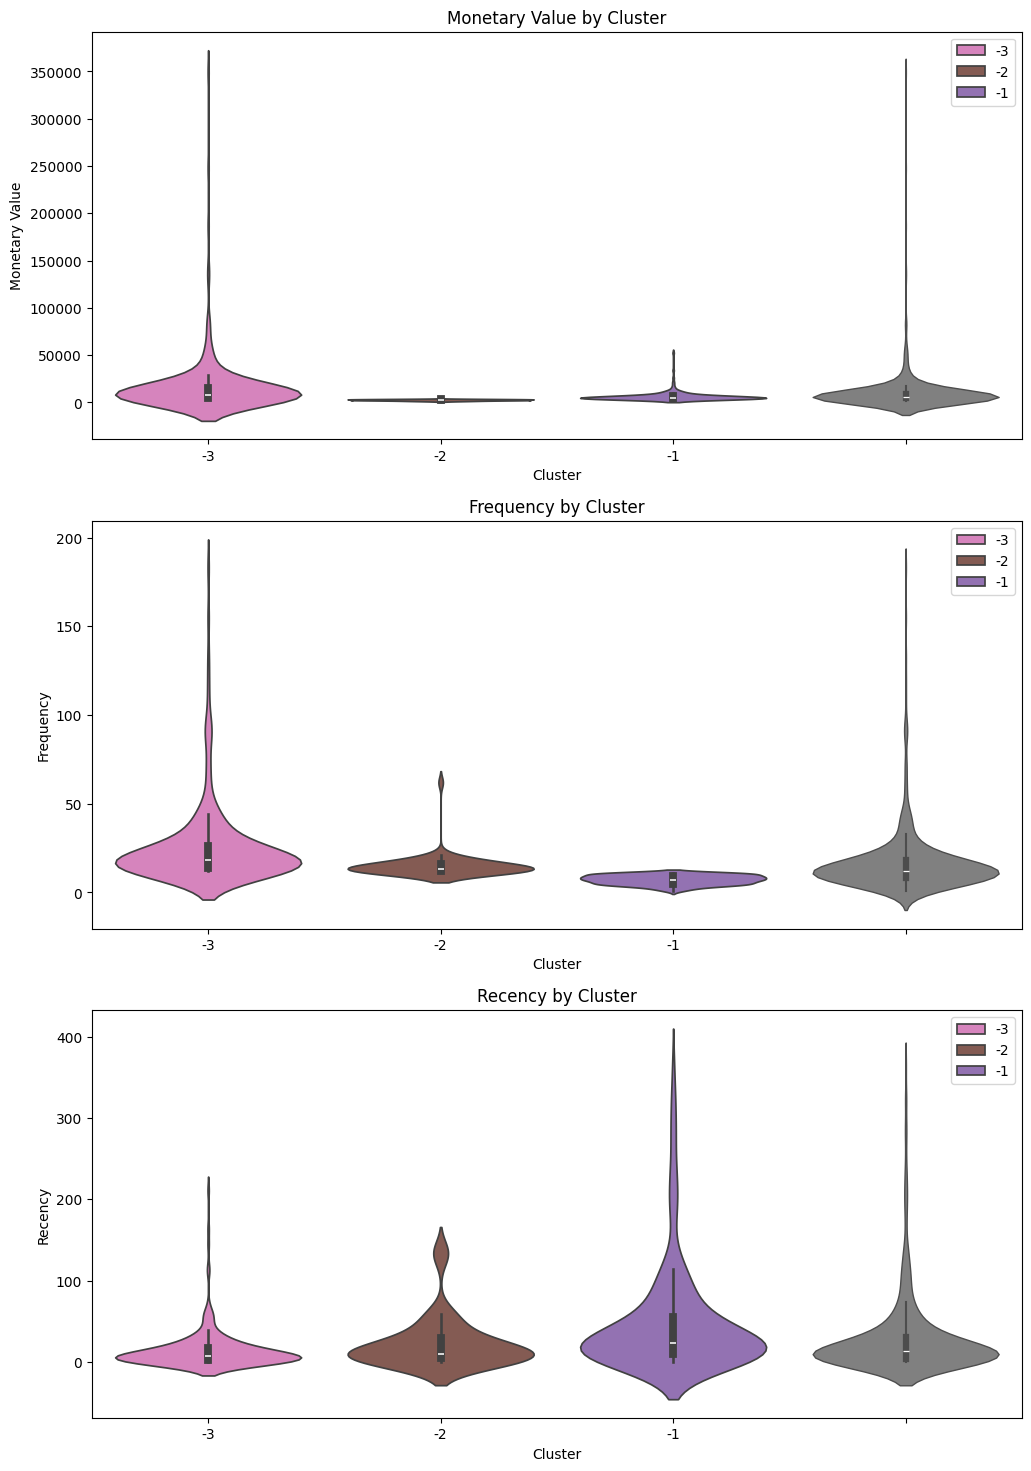

In [63]:
cluster_colors = {-1:'#9467bd',
                  -2:'#8c564b',
                  -3:'#e377c2'}

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'],palette= cluster_colors, hue= outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth= 1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'],palette= cluster_colors, hue= outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth= 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'],palette= cluster_colors, hue= outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth= 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout
plt.show()

1. **Cluster -1 (Monetary Outlier) PAMPER:** 

- Characteristic: High Spenders but not necessarily frequent buyers. Their Purchases are large but infrequent.
- Potiential Strategy: Focus on maintaining their loyality with personalized offers or luxery services that cater to their high spending capacity. 

2. **Cluster -2 (Frequency Outlier) UPSELL:** 

- Characteristic: Frequenet buyers who spend less per purchase. These customers are consistantly engaged but might benefit from upselling opportunities.
- Potiential Strategy: implement loyal programs or bundle deals to encourage higher spending per visit, giving their frequent engagement. 

3. **Cluster -3 (Monetary & Frequency Outlier) DELIGHT:** 

- Characteristic: The most valuable outliers, with extreme spending and frequent purchases, They are likely **TOP-TIER** customers who require special attention.
- Potiential Strategy: Develop VIP programs or exclusive offers to maintain thier loyalty and encourage continued engagement. 

In [64]:
cluster_labels = {-3:"DELIGHT",
                  -2:"UPSELL",
                  -1:"PAMPER",
                  0:'Retain',
                  1:"Re-Engage",
                  2:"Nurture",
                  3:"Reward"}


In [66]:
full_clustering_df = pd.concat([non_outlier_df,outlier_clusters_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [67]:
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,Re-Engage
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,Retain
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,Nurture
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,Retain
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,Nurture
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


## Visualization

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18196\2989309744.py:12: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=Feature_means, ax= ax2, palette= 'Set2', markers="o")


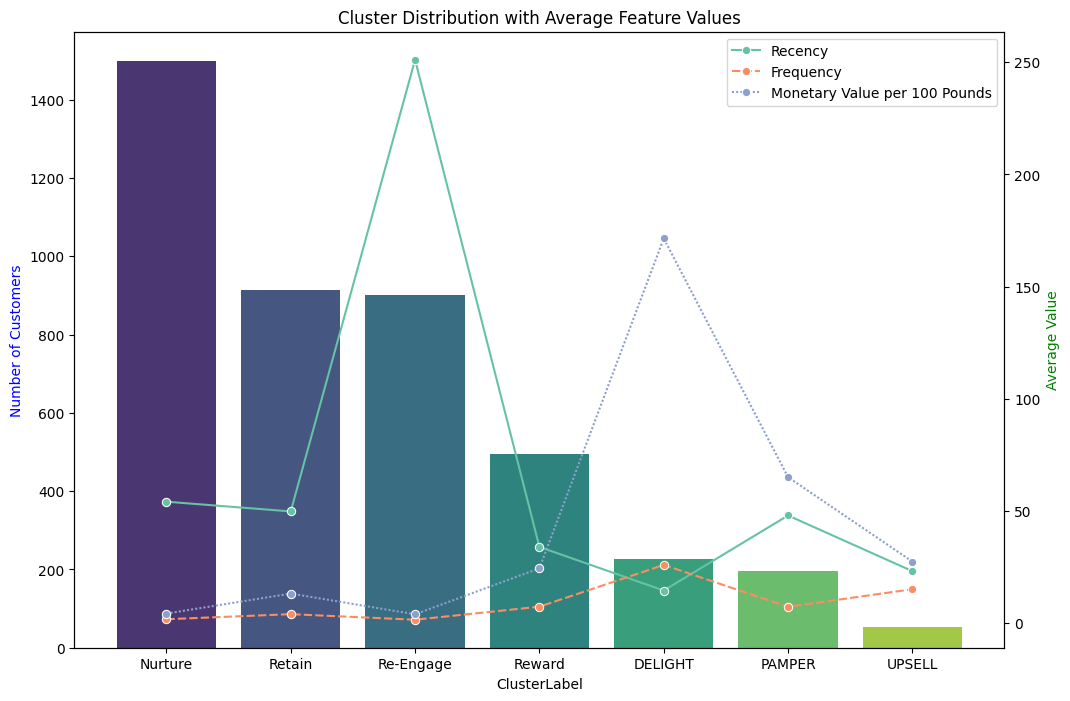

In [77]:
Cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df['Monetary Value per 100 Pounds'] = full_clustering_df['MonetaryValue']/100.00
Feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency','Frequency','Monetary Value per 100 Pounds']].mean()

fig, ax1 = plt.subplots(figsize= (12,8))
sns.barplot(x= Cluster_counts.index, y=Cluster_counts.values, ax= ax1, palette= "viridis",hue= Cluster_counts.index)
ax1.set_ylabel("Number of Customers", color= 'b')
ax1.set_title("Cluster Distribution with Average Feature Values")

ax2 = ax1.twinx()

sns.lineplot(data=Feature_means, ax= ax2, palette= 'Set2', markers="o")
ax2.set_ylabel("Average Value", color= 'g')




plt.show()